In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model = ChatGoogleGenerativeAI(model='gemini-2.5-flash')

In [5]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str

In [6]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate an detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [7]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f"Write a detailed blog on the title - {title} using the following outline \n {outline}"

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [9]:
# create the state graph
graph = StateGraph(BlogState)

# create the nodes
graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

# compile the graph
workflow = graph.compile()

In [10]:
initial_state = {'title':'Rise of AI in India'}

final_state = workflow.invoke(initial_state)

print(final_state)

{'title': 'Rise of AI in India', 'outline': 'Here\'s a detailed outline for a blog post on "The Rise of AI in India," designed to be comprehensive, engaging, and informative.\n\n---\n\n## Blog Title Options:\n*   The AI Awakening: India\'s Leap into the Future of Intelligence\n*   India\'s AI Ascent: Powering a Digital Transformation\n*   From Code to Consciousness: The Rapid Rise of AI in India\n*   Beyond the Hype: How India is Building its AI Future\n\n---\n\n## I. Introduction (Approx. 150-200 words)\n\n*   **A. Catchy Hook:** Start with a compelling statement or question about the omnipresence of AI globally, and its unique trajectory in a country like India.\n    *   *Example:* "From personalized recommendations to autonomous systems, Artificial Intelligence is reshaping our world. But while Silicon Valley often grabs the headlines, a silent, yet powerful, AI revolution is unfolding in one of the world\'s fastest-growing economies: India."\n*   **B. Brief Definition of AI:** A qu

In [11]:
print(final_state['outline'])

Here's a detailed outline for a blog post on "The Rise of AI in India," designed to be comprehensive, engaging, and informative.

---

## Blog Title Options:
*   The AI Awakening: India's Leap into the Future of Intelligence
*   India's AI Ascent: Powering a Digital Transformation
*   From Code to Consciousness: The Rapid Rise of AI in India
*   Beyond the Hype: How India is Building its AI Future

---

## I. Introduction (Approx. 150-200 words)

*   **A. Catchy Hook:** Start with a compelling statement or question about the omnipresence of AI globally, and its unique trajectory in a country like India.
    *   *Example:* "From personalized recommendations to autonomous systems, Artificial Intelligence is reshaping our world. But while Silicon Valley often grabs the headlines, a silent, yet powerful, AI revolution is unfolding in one of the world's fastest-growing economies: India."
*   **B. Brief Definition of AI:** A quick, accessible explanation of what AI is (machine learning, deep

In [12]:
final_state['content']

'## India\'s AI Ascent: Powering a Digital Transformation\n\nFrom personalized recommendations that predict our next purchase to autonomous systems quietly optimizing logistics, Artificial Intelligence is undeniably reshaping our world. But while the technological epicenters of Silicon Valley often grab the global headlines, a silent, yet powerful, AI revolution is unfolding in one of the world\'s fastest-growing and most populous economies: India.\n\nAt its core, Artificial Intelligence refers to the ability of machines to simulate human intelligence – learning from data, recognizing patterns, making decisions, and understanding natural language. This encompasses a broad spectrum of technologies like machine learning, deep learning, natural language processing (NLP), and computer vision. This blog post will delve into India\'s rapid adoption, innovation, and strategic positioning in the global AI landscape, driven by unique socio-economic factors and aiming for significant societal an

In [13]:
def evaluate(state: BlogState) -> BlogState:
    content = state['content']
    prompt = f"Evaluate the following blog content for clarity, coherence, and engagement:\n\n{content}\n\nProvide feedback and suggestions for improvement."
    evaluation = model.invoke(prompt).content
    state[content] = evaluation
    return state

In [17]:
# create the state graph
graph = StateGraph(BlogState)

# create the nodes
graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)
graph.add_node('evaluate',evaluate)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog','evaluate')
graph.add_edge('evaluate', END)

# compile the graph
workflow = graph.compile()

In [19]:
initial_state = {'title':'Rise of AI in India'}

final_state = workflow.invoke(initial_state)

print(final_state)

{'title': 'Rise of AI in India', 'outline': 'Here\'s a detailed outline for a blog post on "The Rise of AI in India," designed to be comprehensive, engaging, and informative.\n\n---\n\n## Blog Title Options:\n\n*   **The AI Awakening: How India is Redefining the Global AI Landscape**\n*   **From Code to Consciousness: Unpacking India\'s AI Revolution**\n*   **India\'s AI Surge: A Deep Dive into the Nation\'s Intelligent Future**\n*   **The Smart Nation: Exploring the Rise of Artificial Intelligence in India**\n*   **Beyond Silicon Valley: India\'s Unique Path in the AI Era**\n\n---\n\n## Target Audience:\n\n*   Technology enthusiasts and professionals\n*   Investors and entrepreneurs interested in the Indian market\n*   Policy makers and government officials\n*   Students and academics in AI/Tech fields\n*   General readers interested in global tech trends and India\'s economic development\n\n## Tone:\n\nInformative, analytical, optimistic yet balanced, slightly inspiring.\n\n---\n\n##

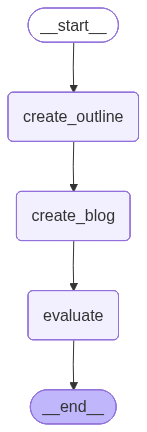

In [18]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())